# Conic Sections

```{admonition} Revised
:class: important
19 Feb 2023
```
```{contents}
```

---

## Imports & Environment

In [31]:
# %load imports.py
import numpy                    as np
import numpy.random             as npr
import pandas                   as pd

import matplotlib               as mpl
mpl.rcParams['lines.color'] = 'k'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color',['k'])
from   matplotlib import cm
from   matplotlib.patches import Ellipse
import matplotlib.pyplot        as plt
plt.style.use('ggplot');
from   matplotlib.ticker import LinearLocator

import plotly
import plotly.express           as px
import plotly.graph_objects     as go

import sympy as sy
from   sympy.geometry import Point, Line
from   sympy import (diff,
                     dsolve,
                     Eq,
                     expand,
                     factor,
                     Function,
                     init_printing,
                     Integer,
                     Integral,
                     integrate,
                     latex,
                     limit,
                     Matrix,
                     Poly,
                     Rational,
                     solve,
                     Symbol,
                     symbols)

S =Symbol
ss=symbols
x,y,z,t,u,v=ss(names='x y z t u v')
init_printing(use_unicode=True)

import math
import numexpr

from   datetime import datetime as d
import locale                   as l
import platform                 as p
import sys                      as s

pad = 20
print(f"{'Executed'.upper():<{pad}}: {d.now()}")
print()
print(f"{'Platform'        :<{pad}}: "
      f"{p.mac_ver()[0]} | "
      f"{p.system()} | "
      f"{p.release()} | "
      f"{p.machine()}")
print(f"{''                :<{pad}}: {l.getpreferredencoding()}")
print()
print(f"{'Python'          :<{pad}}: {s.version}")
print(f"{''                :<{pad}}: {s.version_info}")
print(f"{''                :<{pad}}: {p.python_implementation()}")
print()
print(f"{'Matplotlib'      :<{pad}}: {mpl.__version__}")
print(f"{'Numexpr'         :<{pad}}: {numexpr.__version__}")
print(f"{'NumPy'           :<{pad}}: {np.__version__}")
print(f"{'Pandas'          :<{pad}}: {pd.__version__}")
print(f"{'Plotly'          :<{pad}}: {plotly.__version__}")
print(f"{'SymPy'           :<{pad}}: {sy.__version__}")
# print()
# from pprint import PrettyPrinter
# pp = PrettyPrinter(indent=2)
# pp.pprint([name for name in dir()
#            if name[0] != '_'
#            and name not in ['In', 'Out', 'exit', 'get_ipython', 'quit']])

EXECUTED            : 2023-02-19 20:44:17.015483

Platform            : 13.2.1 | Darwin | 22.3.0 | arm64
                    : UTF-8

Python              : 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]
                    : sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)
                    : CPython

Matplotlib          : 3.6.3
Numexpr             : 2.8.3
NumPy               : 1.24.1
Pandas              : 1.5.3
Plotly              : 5.13.0
SymPy               : 1.11.1


## Auxiliary code

In [39]:
x=np.linspace(-9,9,400)
y=np.linspace(-9,9,400)
x,y=np.meshgrid(x,y)

def axes ():
  plt.axhline(0,alpha=0.1)
  plt.axvline(0,alpha=0.1)

---

## Linear Equation


linear in $n$ variables $x_1,...,x_n$

$a_1x_1+a_2x_2+...+a_nx_n=b$

linear in two variables $x,y$

Standard Form of a Line

$Ax+By=C$

Point-Slope Form

$y-y_0=m(x-x_0)$ for point $(x_0,y_0)$ and slope $m$

Slope-Intercept Form

$y=mx+b$

$
\begin{aligned}
Ax+By=C
\implies By=-Ax+C
\implies y=-\frac{A}{B}x+\frac{C}{B}
\implies y=mx+b\,\,\,\text{where}\,\,\,m=-\frac{A}{B}\,\,\,\text{and}\,\,\,b=\frac{B}{C}
\end{aligned}
$

---

## General quadratic in a single variable

General form of a quadratic equation in a single variable $x$

$Ax^2+Bx+C=0$ where $A\ne0$

---

## General quadratic in two variables

General form of a quadratic equation in two variables $x,y$

with cross terms

$Ax^2+Bxy+Cy^2+Dx+Ey+F=0$ where $A\ne0\lor B\ne0\lor C\ne0$

without cross terms

$Ax^2+By^2+Cx+Dy+E=0$ where $A\ne0\lor B\ne0$

---

## Conics

Parabola

$
(y-k)=a(x-h)^2
$

Ellipse

$
\begin{aligned}
\left(\frac{x-h}{a}\right)^2+\left(\frac{y-k}{b}\right)^2=1
\end{aligned}
$

Hyperbola

$
\begin{aligned}
\left(\frac{x-h}{a}\right)^2-\left(\frac{y-k}{b}\right)^2&=1\\
\left(\frac{y-k}{b}\right)^2-\left(\frac{x-h}{a}\right)^2&=1\\
\end{aligned}
$

---

## Parabola

### Standard Form of a Parabola

Start with the general quadratic in two variables $x,y$ ignoring cross terms

$
Ax^2+By^2+Cx+Dy+E=0
$
where $A=0\lor B=0$

$Ax^2+Cx+Dy+E=0$

or

$By^2+Cx+Dy+E=0$

Complete the square

$
\begin{aligned}
Ax^2+Cx+Dy+E&=0\\
\implies\\
-Dy-E&=Ax^2+Cx\\
\implies\\
-Dy-E&=A\left(x^2+\frac{C}{A}x\right)\\
\implies\\
-Dy-E&=A\left(\left(x+\frac{C}{2A}\right)^2-\left(\frac{C}{2A}\right)^2\right)\\
\implies\\
-Dy-E&=A\left(x+\frac{C}{2A}\right)^2-\frac{C^2}{4A}\\
\implies\\
-Dy-E+\frac{C^2}{4A}&=A\left(x+\frac{C}{2A}\right)^2\\
\implies\\
y+\frac{E}{D}-\frac{C^2}{4AD}&=-\frac{A}{D}\left(x+\frac{C}{2A}\right)^2\\
\implies\\
y-\left(\frac{C^2}{4AD}-\frac{E}{D}\right)&=-\frac{A}{D}\left(x-\left(-\frac{C}{2A}\right)\right)^2\\
\implies\\
y-k&=a\left(x-h\right)^2\\
\end{aligned}
$

where

$k=\left(\frac{C^2}{4AD}-\frac{E}{D}\right)$

$a=-\frac{A}{D}$

$h=\left(-\frac{C}{2A}\right)$

---


Standard Form of a Parabola

$(y-k)=a(x-h)^2$ is $y=x^2$ shifted right $h$ units; shifted up $k$ units; and stretched vertically by a factor of $a$; with vertex $(h,k)$

as a function

$y=a(x-h)^2+k$

find the vertex via differentiation to see where the graph has a horizontal tangent line

$
\begin{aligned}
y
&=a(x-h)^2+k\\
&=ax^2-2ahx+ah^2+k\implies\\
y'&=2ax-2ah\\
0&=2ax-2ah\implies\\
x&=h\implies y=k\\
\end{aligned}
$

complete the square in the squared variable to find the vertex

plug the vertex into the equation $y=ax^2+bx+c$ to find the y-intercept

factor the equation to find any roots

a parabola has an axis of symmetry through its vertex; therefore, any point on one side of the parabola is informative of a point on the other side

when the squared variable is y, then the graph is a shifted and stretched version of $x=y^2$

in this case, the parabola always has an x-intercept and the roots of the parabola are y-intercepts

---

[EXAMPLE]

$
\begin{aligned}
2x^2-4x-y=6
&\implies y+6=2x^2-4x\\
&\implies y+6=2(x^2-2x)\\
&\implies y+6=2((x-1)^2-1)\\
&\implies y+6=2(x-1)^2-2\\
&\implies y+8=2(x-1)^2\\
\end{aligned}
$

vertex

$(h,k)=(1,-8)$

$
\begin{aligned}
2x^2-4x-y=6
&\implies y=2x^2-4x-6\\
x=0&\implies y=-6\\
\end{aligned}
$

y-intercept

$(0,y)=(0,-6)$

$
\begin{aligned}
2x^2-4x-y=6
&\implies y=2x^2-4x-6\\
&\implies y=2(x^2-2x-3)\\
&\implies y=2(x-3)(x+1)\\
\end{aligned}
$

roots (x-intercepts)

$x-3=0\implies x=3$

$x+1=0\implies x=-1$

by symmetry

$(2h,y)=(2,-6)$

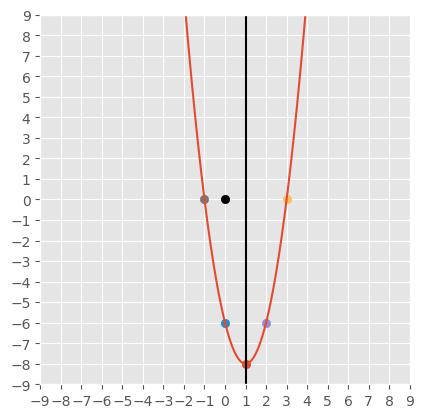

In [6]:
s=9
x=np.linspace(-s,s,1001);
y=2*x**2-4*x-6

plt.axes().set_aspect(1);
plt.xlim((-s,s));
plt.xticks(np.arange(-s,s+1,1));
plt.ylim((-s,s));
plt.yticks(np.arange(-s,s+1,1));

plt.plot(x,y);
plt.scatter(0,0,color='black');
plt.axvline(x=1,color='black');
plt.scatter( 1,-8);
plt.scatter( 0,-6);
plt.scatter( 2,-6);
plt.scatter(-1, 0);
plt.scatter( 3, 0);

---

[EXAMPLE]

$
\begin{aligned}
x+4y=y^2+5
&\implies x=y^2-4y+5\\
&\implies x=(y-2)^2+1\\
&\implies x-1=(y-2)^2\\
\end{aligned}
$

vertex

$(h,k)=(1,2)$

$
\begin{aligned}
x+4y=y^2+5
&\implies x=y^2-4y+5\\
y=0&\implies x=5\\
\end{aligned}
$

x-intercept

$(x,0)=(5,0)$

roots (y-intercepts)

$
\begin{aligned}
y=\frac{-b\pm\sqrt{b^2-4ac}}{a^2}
&\implies y=\frac{-(-4)\pm\sqrt{(-4)^2-4(1)(5)}}{(1)^2}\\
&\implies y=4\pm\sqrt{16-20}\\
&\implies y=4\pm2\sqrt{-1}\\
&\implies y=4\pm2i\\
\end{aligned}
$

by symmetry

$(x,2k)=(5,4)$

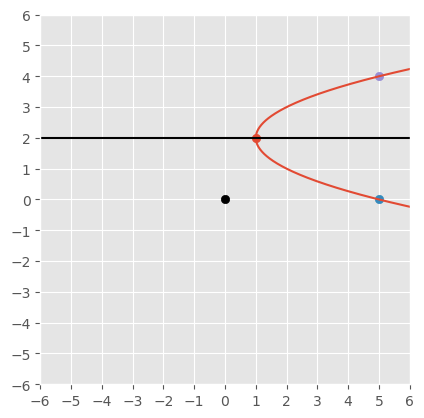

In [7]:
s=6
y=np.linspace(-s,s,1001);
x=y**2-4*y+5

plt.axes().set_aspect(1);
plt.xlim((-s,s));
plt.xticks(np.arange(-s,s+1,1));
plt.ylim((-s,s));
plt.yticks(np.arange(-s,s+1,1));

plt.plot(x,y);
plt.scatter(0,0,color='black');
plt.axhline(y=2,color='black');
plt.scatter(1,2);
plt.scatter(5,0);
plt.scatter(5,4);

---

$
y^2=4ax
$
where $a\gt0$

focus $(a,0)$

directrix $x=-a$

### Example in standard position

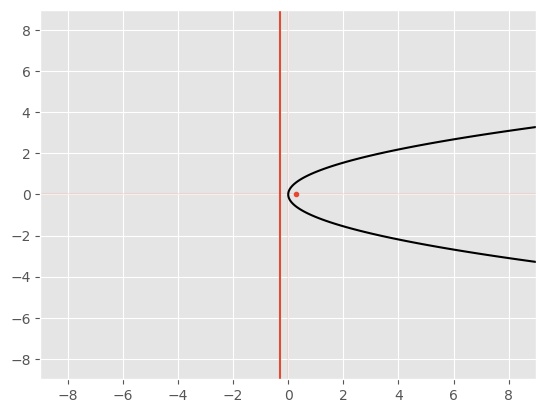

In [3]:
x=np.linspace(-9,9,400)
y=np.linspace(-9,9,400)
x,y=np.meshgrid(x,y)

def axes ():
  plt.axhline(0,alpha=0.1)
  plt.axvline(0,alpha=0.1)

a=0.3
axes()
plt.contour(x,y,y**2-4*a*x,[0],colors='k');
# focus
plt.plot(a,0,'.');
# directrix
plt.axvline(-a);

---

### Non Standard Form of a Parabola

Start with the general quadratic in two variables $x,y$

$
Ax^2+Bxy+Cx^2+Dx+Ey+F=0
$
where $B^2-4AC=0$

---

### Example in non standard position

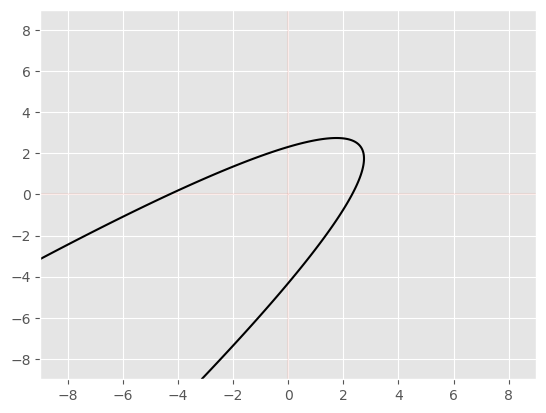

In [12]:
a=  1
b= -2
c=  1
d=  2
e=  2
f=-10
assert b**2 - 4*a*c == 0

general=a*x**2 + b*x*y + c*y**2 + d*x + e*y + f

axes()
plt.contour(x,y,general,[0],colors='k');

---

## Ellipse

---

### Standard Form of an Ellipse

Start with the general quadratic in two variables $x,y$ ignoring cross terms

$
Ax^2+By^2+Cx+Dy+E=0
$
where $A\ne0\land B\ne0$ and $A$ and $B$ have the same sign

Complete the square in each variable separately to transform the general equation into the standard form of an ellipse.

$
\begin{aligned}
Ax^2+By^2+Cx+Dy+E&=0\\
\implies\\
(Ax^2+Cx)+(By^2+Dy)&=-E\\
\implies\\
A\left(x^2+\frac{C}{A}x\right)+B\left(y^2+\frac{D}{B}y\right)&=-E\\
\implies\\
A\left(x^2+\frac{C}{A}x+\left(\frac{C}{2A}\right)^2\right)+B\left(y^2+\frac{D}{B}y+\left(\frac{D}{2B}\right)^2\right)&=-E+A\left(\frac{C}{2A}\right)^2+B\left(\frac{D}{2B}\right)^2\\
\implies\\
A\left(x+\frac{C}{2A}\right)^2+B\left(y+\frac{B}{2D}\right)^2&=\frac{C^2}{4A}+\frac{D^2}{4B}-E\\
\implies\\
A\left(x+\frac{C}{2A}\right)^2+B\left(y+\frac{B}{2D}\right)^2&=\frac{BC^2+AD^2-4ABE}{4AB}\\
\implies\\
\frac{4AB}{BC^2+AD^2-4ABE}\left(A\left(x+\frac{C}{2A}\right)^2+B\left(y+\frac{B}{2D}\right)^2\right)&=1\\
\implies\\
\frac{4A^2B}{BC^2+AD^2-4ABE}\left(x+\frac{C}{2A}\right)^2+\frac{4AB^2}{BC^2+AD^2-4ABE}\left(y+\frac{B}{2D}\right)^2&=1\\
\implies\\
...\\
\end{aligned}
$

---

Standard Form of an Ellipse

$
\begin{aligned}
\left(\frac{x-h}{a}\right)^2+\left(\frac{y-k}{b}\right)^2=1
\end{aligned}
$

$(h,k)$ center

$a$ horizontal stretch factor

$b$ vertical stretch factor

an ellipse centered at the origin

$
\begin{aligned}
\frac{x^2}{a^2}+\frac{y^2}{b^2}=1
\end{aligned}
$

given the center of an ellipse
* plug the x-coordinate of the center of the ellipse into the equation of the ellipse to find the y-coordinates of two points on the ellipse
* plut the y-coordinate of the center of the ellipse into the equation of the ellipse to find the x-coordinates of two points on the ellipse

if $a=b=r$, then the graph is a circle with radius $r$

$
\begin{aligned}
\frac{x^2}{r^2}+\frac{y^2}{r^2}=1
\implies
x^2+y^2=r^2
\end{aligned}
$

Unit Circle (radius $r=1$)

$x^2+y^2=1$

center $(0,0)$

[CASE]

Point (or Circle of radius $r=0$)

[EXAMPLE]

$
\begin{aligned}
(x-3)^2+(y+2)^2=0
&\implies
(x-3)^2=0
\land
(y+2)^2=0\\
&\implies
x-3=0
\land
y+2=0\\
&\implies
x=3
\land
y=-2\\
\end{aligned}
$

the only way for two square values to sum to zero is for each square itself to be equal to zero

[CASE]

DNE (or Circle with negative radius $r$)

[EXAMPLE]

$
\begin{aligned}
(x+4)^2+(y-1)^2=-2
\end{aligned}
$

two square values cannot sum to a negative number

---

[EXAMPLE]

$
\begin{aligned}
4x^2+y^2=6y-5
&\implies4x^2+y^2-6y=-5\\
&\implies4(x^2)+(y^2-6y)=-5\\
&\implies4(x^2)+(y^2-6y+9)=-5+9\\
&\implies4(x^2)+(y-3)^2=4\\
&\implies x^2+\left(\frac{y-3}{2}\right)^2=1\\
\end{aligned}
$

center $(0,3)$

$a=1$

$b=2$

$
\begin{aligned}
x=0
&\implies
y^2-6y+5=0\\
&\implies(y-5)(y-1)=0\\
&\implies y-5=0\land y-1=0\\
&\implies y=5\land y=1\\
\end{aligned}
$

$
\begin{aligned}
y=3
&\implies
4x^2+(3)^2-6(3)=-5\\
&\implies
x^2=1\\
&\implies
x=\pm1\\
\end{aligned}
$

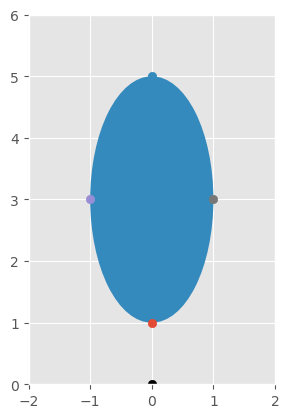

In [8]:
h,k,a,b=0,3,1,2

fig,ax=plt.subplots(subplot_kw={'aspect':'equal'});
ax.add_artist(
  Ellipse(xy    =(h,k),
          width =2*a,
          height=2*b)
);
plt.scatter(0,0,color='black');
ax.set_xlim(h-a-1,h+a+1);
ax.set_ylim(k-b-1,k+b+1);

plt.scatter( 0,1);
plt.scatter( 0,5);
plt.scatter(-1,3);
plt.scatter( 1,3);

---

[EXAMPLE]

$
\begin{aligned}
9x^2+4y^2-54x+8y+49=0
&\implies
(9x^2-54x)+(4y^2+8y)=-49\\
&\implies
9(x^2-6x)+4(y^2+2y)=-49\\
&\implies
9(x^2-6x+9)+4(y^2+2y+1)=-49+81+4\\
&\implies
9(x-3)^2+4(y+1)^2=36\\
&\implies
\left(\frac{x-3}{2}\right)^2+\left(\frac{y+1}{3}\right)^2=1\\
\end{aligned}
$

$(3,-1)$ center

$a=2,b=3$

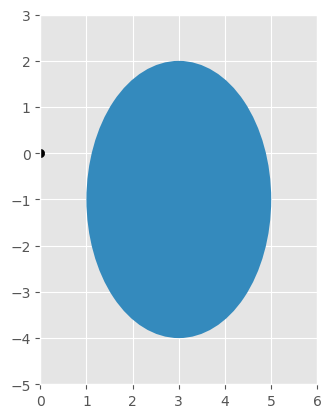

In [9]:
h,k,a,b=3,-1,2,3

fig,ax=plt.subplots(subplot_kw={'aspect':'equal'});
ax.add_artist(
  Ellipse(xy    =(h,k),
          width =2*a,
          height=2*b)
);
plt.scatter(0,0,color='black');
ax.set_xlim(h-a-1,h+a+1);
ax.set_ylim(k-b-1,k+b+1);

# plt.scatter();
# plt.scatter();
# plt.scatter();
# plt.scatter();

---

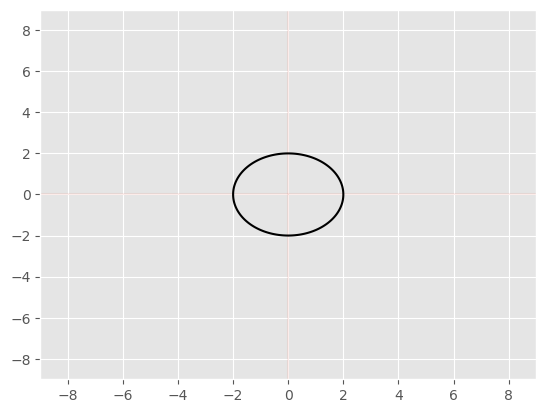

In [14]:
r=2

axes()
plt.contour(x,y,x**2/r**2 + y**2/r**2,[1],colors='k');

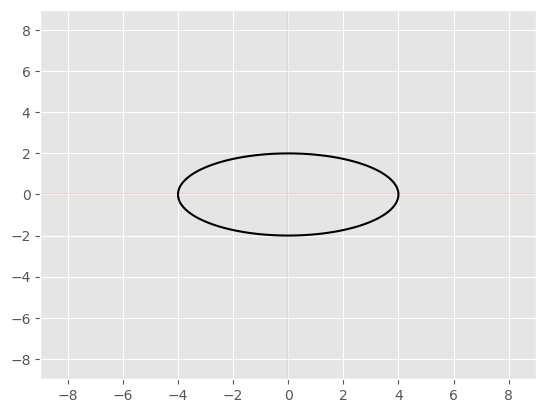

In [15]:
a=4
b=2

axes()
plt.contour(x,y,x**2/a**2 + y**2/b**2,[1],colors='k');

---

### Nonstandard ellipse

Start with the general quadratic in two variables $x,y$

$
Ax^2+Bxy+Cx^2+Dx+Ey+F=0
$
where $B^2-4AC\lt0$

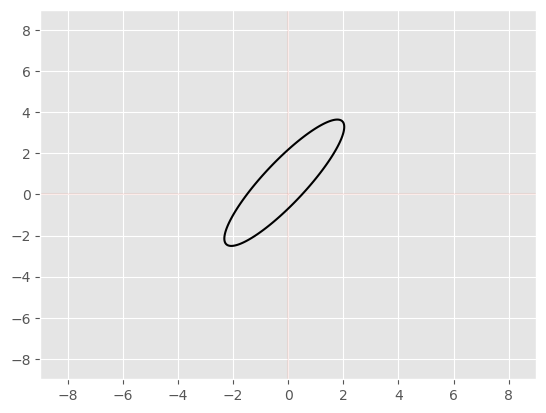

In [16]:
a=  4
b= -5
c=  2
d=  4
e= -3
f= -3
assert b**2 - 4*a*c < 0

general=a*x**2 + b*x*y + c*y**2 + d*x + e*y + f

axes()
plt.contour(x,y,general,[0],colors='k');

---

## Hyperbola

Start with the general quadratic in two variables $x,y$ ignoring cross terms

$
Ax^2+By^2+Cx+Dy+E=0
$
where $A\ne0\land B\ne0$ and $A$ and $B$ have opposite sign


Standard Forms of a Hyperbola

$
\begin{aligned}
\left(\frac{x-h}{a}\right)^2-\left(\frac{y-k}{b}\right)^2&=1\\
\left(\frac{y-k}{b}\right)^2-\left(\frac{x-h}{a}\right)^2&=1\\
\end{aligned}
$

shifted to the right $h$ units

shifted up $k$ units

$a$ horizontal scale factor

$b$ vertical scale factor

$
\begin{aligned}
x^2-y^2&=1\\
y^2-x^2&=1\\
\end{aligned}
$

Hyperbolas are not single, connected curves; but two symmetric branches. The point halfway beween them is $(h,k)$.

The graph of the hyperbola will approach the asymptotes as the graph goes to infinity.

Finding the equations of the asymptotes
1. standard form
2. set the left hand side equal to zero
3. simplify the equation via factoring or square roots
4. equations of two lines

Find the center $(h,k)$

Plugin the x and y coordinates of the center into the equation, separately, and solve for the other coordinate

One of these coordinates will yield a pair of points; the other will not have solutions

These points determine whether the hyperbola opens horizontally or vertically

First, graph the asymptotes

---

[SPECIAL CASE]

The graph is just a pair of crossed lines

[EXAMPLE]

$
\begin{aligned}
x^2-y^2-6x+8y-7&=0\\
\implies\\
(x^2-6x)-(y^2-8y)&=7\\
\implies\\
(x-3)^2-9-(y-4)^2+16&=7\\
\implies\\
(x-3)^2-(y-4)^2&=0\\
\implies\\
(x-3)^2&=(y-4)^2\\
\implies\\
\sqrt{(x-3)^2}&=\sqrt{(y-4)^2}\\
\implies\\
x-3&=\pm(y-4)\\
\implies\\
x-3&=y-4\\
x-3&=-(y-4)\\
\implies\\
y&=x+1\\
y&=-x+7\\
\end{aligned}
$

---

eccentricity $e$

$
\begin{aligned}
e=\sqrt{1+\frac{b^2}{a^2}}\gt1
\end{aligned}
$

foci

directrices

asymptotes

$
\begin{aligned}
y=\pm\frac{b}{a}x
\end{aligned}
$

---

$
x^2-y^2=1
$

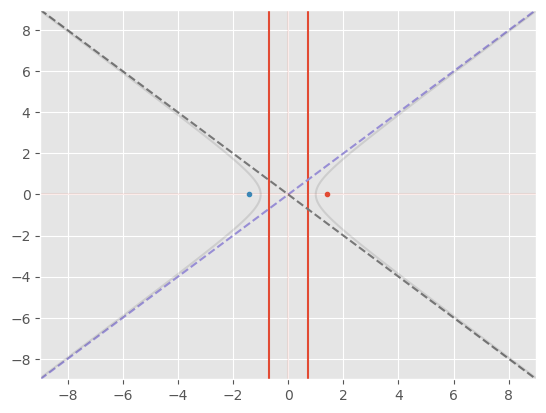

In [29]:
a = b = 1

# eccentricity
e = np.sqrt(1 + b**2/a**2)

# foci
plt.plot(a*e,0,'.',-a*e,0,'.');

# directrices
plt.axvline( a/e);
plt.axvline(-a/e);

# asymptotes
plt.plot(x[0,:], b/a*x[0,:],'--');
plt.plot(x[0,:],-b/a*x[0,:],'--');

eq = x**2/a**2 - y**2/b**2
axes()
plt.contour(x,y,eq,[1],colors='k',alpha=0.1);

---

$
y^2-x^2=1
$

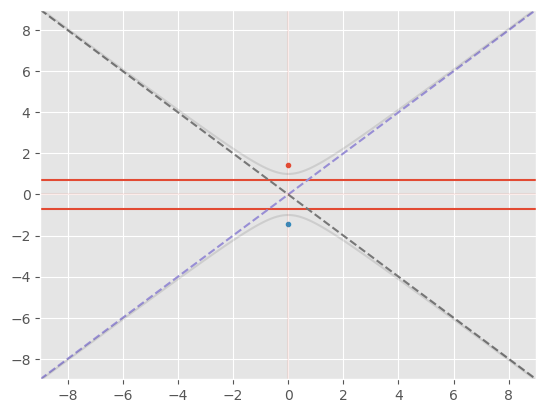

In [28]:
a = b = 1

# eccentricity
e = np.sqrt(1 + b**2/a**2)

# foci
plt.plot(0,a*e,'.',0,-a*e,'.');

# directrices
plt.axhline( a/e);
plt.axhline(-a/e);

# asymptotes
plt.plot(x[0,:], b/a*x[0,:],'--');
plt.plot(x[0,:],-b/a*x[0,:],'--');

eq = y**2/b**2 - x**2/a**2
axes()
plt.contour(x,y,eq,[1],colors='k',alpha=0.1);

---

[EXAMPLE]

Determine the center

$
\begin{aligned}
x^2-4y^2&=16\\
\implies\\
\frac{x^2}{16}-\frac{4y^2}{16}&=1\\
\implies\\
\left(\frac{x}{4}\right)^2-\left(\frac{y}{2}\right)^2&=1\\
\implies\\
(h,k)&=(0,0)\\
a,b&=4,2\\
\end{aligned}
$

Determine the intercepts

$
\begin{aligned}
y=0
\implies
x^2=16
\implies
x=\pm\sqrt{16}
\implies
x=\pm4
\end{aligned}
$

$
\begin{aligned}
x=0
\implies
-4y^2=16
\implies
y^2=-4
\implies
y=\pm2\sqrt{-1}
\implies
\text{no real solutions}
\end{aligned}
$

Determine the equations of the asymptotes

$
\begin{aligned}
x^2-4y^2&=0\\
\implies\\
(x+2y)(x-2y)&=0\\
\implies\\
x+2y&=0\\
x-2y&=0\\
\implies\\
y&=-\frac{1}{2}x\\
y&=\frac{1}{2}x\\
\end{aligned}
$

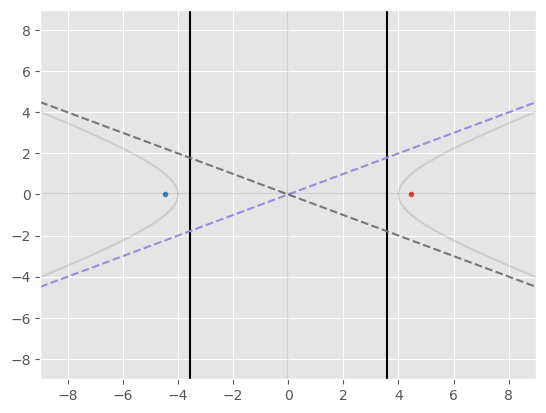

In [47]:
a,b,h,k=4,2,0,0

# eccentricity
e = np.sqrt(1 + b**2/a**2)

# foci
plt.plot(a*e,0,'.',-a*e,0,'.');

# directrices
plt.axvline( a/e);
plt.axvline(-a/e);

# asymptotes
plt.plot(x[0,:], b/a*x[0,:],'--');
plt.plot(x[0,:],-b/a*x[0,:],'--');

eq = x**2/a**2 - y**2/b**2
axes()
plt.contour(x,y,eq,[1],colors='k',alpha=0.1);

---

[EXAMPLE]

Determine the center

$
\begin{aligned}
x^2+2x-y^2+6y-7&=0\\
\implies\\
(x^2+2x)-(y^2-6y)&=7\\
\implies\\
(x+1)^2-1-(y-3)^2+9&=7\\
\implies\\
(x+1)^2-(y-3)^2&=-1\\
\implies\\
(y-3)^2-(x+1)^2&=1\\
\implies\\
(h,k)&=(-1,3)\\
a,b&=1,1\\
\end{aligned}
$

Determine the intercepts

$
\begin{aligned}
x=-1
\implies
(y-3)^2=1
\implies
\sqrt{(y-3)^2}=\pm\sqrt{1}
\implies
y=\pm1+3
\implies
y&=2\\
y&=4\\
\end{aligned}
$

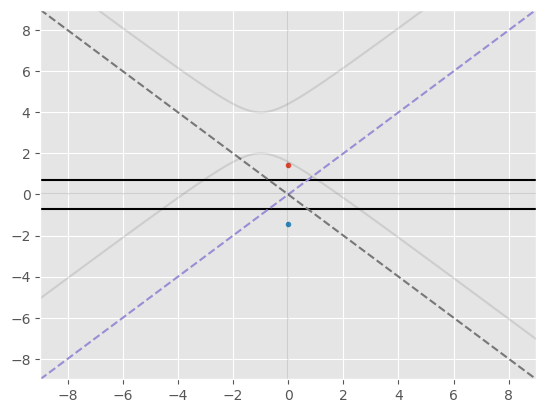

In [49]:
a,b,h,k=1,1,-1,3

# eccentricity
e = np.sqrt(1 + b**2/a**2)

# foci
plt.plot(0,a*e,'.',0,-a*e,'.');

# directrices
plt.axhline( a/e);
plt.axhline(-a/e);

# asymptotes
plt.plot(x[0,:], b/a*x[0,:],'--');
plt.plot(x[0,:],-b/a*x[0,:],'--');

eq = (y-k)**2/b**2 - (x-h)**2/a**2
axes()
plt.contour(x,y,eq,[1],colors='k',alpha=0.1);

---

### Nonstandard hyperbola

The general quadratic in two variables $x,y$

$
Ax^2+Bxy+Cx^2+Dx+Ey+F=0
$
where $B^2-4AC\gt0$

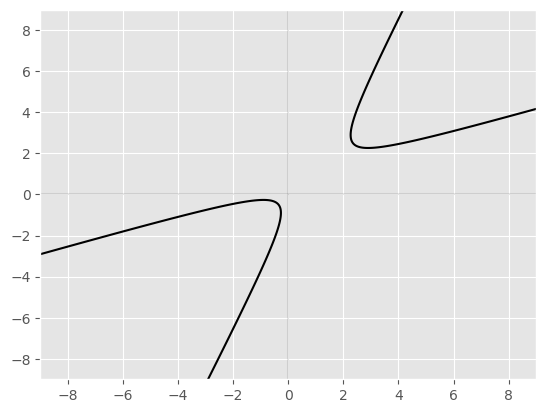

In [34]:
a=  1
b= -3
c=  1
d=  1
e=  1
f=  1
assert b**2 - 4*a*c > 0

g = a*x**2 + b*x*y + c*y**2 + d*x + e*y + f

axes()
plt.contour(x,y,g,[0],colors='k');

---